In [1]:
import networkx as nx

from manim import *

from selma import BACKGROUND
from selma.graph import gvlayout_factory, test_draw, MGraph
from selma.datastructures import MQueue

config.background_color = BACKGROUND

In [2]:
edges = [
 ('Acciaiuoli', 'Medici'),
 ('Medici', 'Barbadori'),
 ('Medici', 'Ridolfi'),
 ('Medici', 'Tornabuoni'),
 ('Medici', 'Albizzi'),
 ('Medici', 'Salviati'),
 ('Castellani', 'Peruzzi'),
 ('Castellani', 'Strozzi'),
 # ('Castellani', 'Barbadori'),
 ('Peruzzi', 'Strozzi'),
 ('Peruzzi', 'Bischeri'),
 ('Strozzi', 'Ridolfi'),
 ('Strozzi', 'Bischeri'),
 ('Ridolfi', 'Tornabuoni'),
 ('Tornabuoni', 'Guadagni'),
 ('Albizzi', 'Ginori'),
 ('Albizzi', 'Guadagni'),
 ('Salviati', 'Pazzi'),
 ('Bischeri', 'Guadagni'),
 ('Guadagni', 'Lamberteschi'),
 #
 ('Ginori', 'Acciaiuoli'),
 ('Barbadori', 'Castellani'),
]
G = nx.DiGraph(edges)

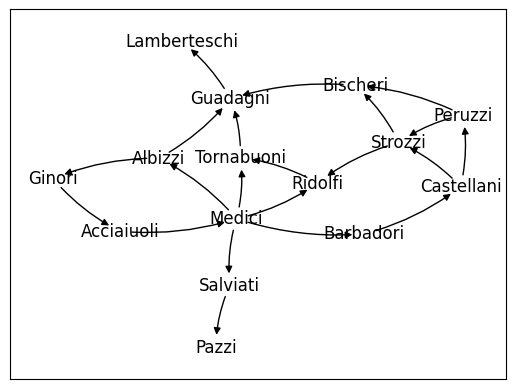

In [3]:
layout = gvlayout_factory('neato', heightscale=.7)
test_draw(G, layout)

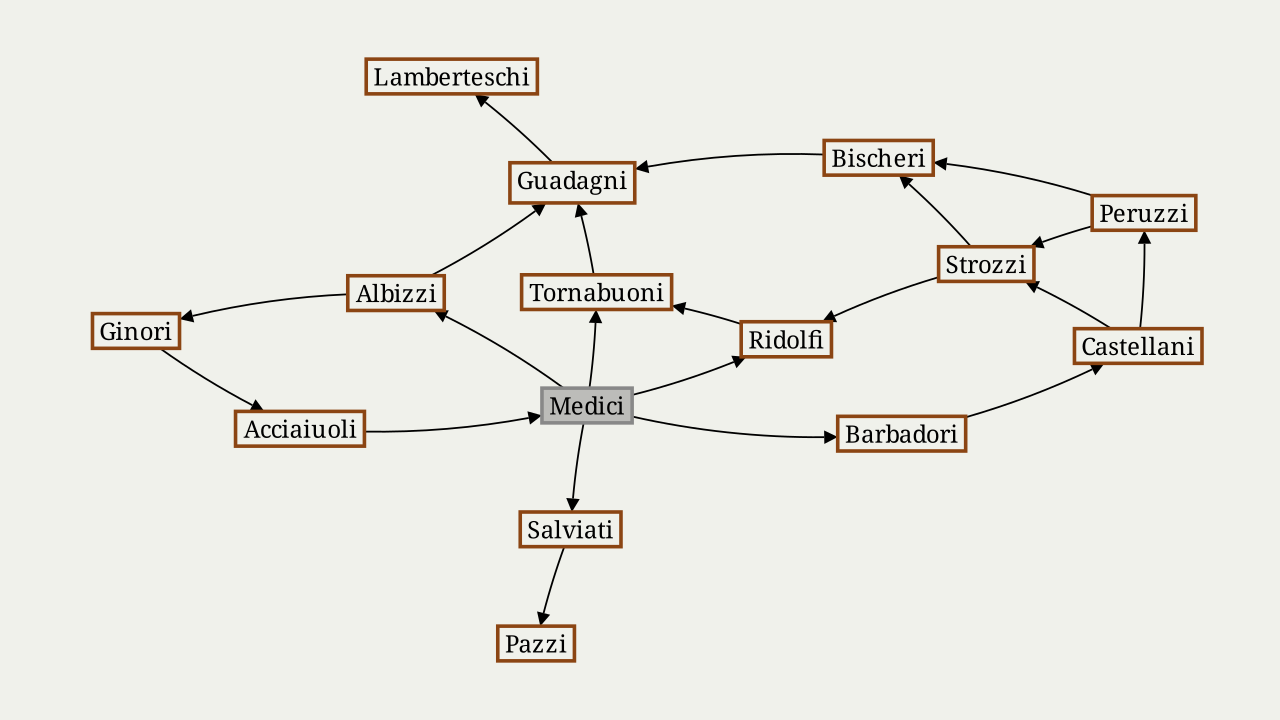

In [6]:
%%manim --hide-splash -qm -v WARNING Draw

HIGHLIGHT = YELLOW


class Draw(Scene):
  def construct(self):
    MG = MGraph(G, layout, node_scale=.6)
    self.add(MG.medges, MG.mnodes)

    def mark(n):
      mn = MG.mnode(n)
      mn[0].set_fill(color=GRAY, opacity=.5)
      mn.set(stroke_color=GRAY)

    mark('Medici')
    # MG.mnode('Medici')[0].set_fill(color=HIGHLIGHT, opacity=.3)
    # MG.medge('Medici', 'Ridolfi').set_color(HIGHLIGHT)


In [ ]:
%%manim --renderer=opengl --hide-splash -pqm -v WARNING BFS

class BFS(Scene):
  def construct(self):
    
    
    Q = MQueue(scale=.6, width=12)
    self.add(Q.rect.to_edge(UP))
    MG = MGraph(G, layout, node_scale=.6)
    MG.scale(.8)
    MG.shift(DOWN/2)
    self.add(MG.medges, MG.mnodes)
    self.next_section()
    start = 'Medici'
    
    dot = Dot(color = YELLOW)
    
    def enqueue(n):
      if n in enqueue.nodes: return
      enqueue.nodes.add(n)
      mn = MG.mnode(n)
      mn[0].set_fill(color=GRAY, opacity=.5)
      mn.set(stroke_color=GRAY)
      self.play(Q.enqueue(mn.copy()), run_time=.5)
    enqueue.nodes = set()
    
    enqueue(start)
    while Q.queue:
      e = Q.queue[-1][1].text
      self.play(Q.dequeue(), run_time=1.5)
      MG.mnode(e).set(stroke_color = YELLOW)
      for t in G.neighbors(e):
        MG.medge(e, t).set_color(YELLOW)
      for t in G.neighbors(e):
        self.play(MG.movealong(dot, e, t), run_time = .5)
        enqueue(t)
      MG.mnode(e).set(stroke_color = GREEN)
      for t in G.neighbors(e):
        MG.medge(e, t).set_color(BLACK)
        

/home/santini/Documents/Activities/Talks/cremona-2025/.venv/lib/python3.12/site-packages/manim/mobject/geometry/arc.py:424: UserWarning: Can't find Arc center, using ORIGIN instead
  warnings.warn(
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x70f4999791c0>>
Traceback (most recent call last):
  File "/home/santini/Documents/Activities/Talks/cremona-2025/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Animation 43: Succession(OpenGLGroup):  71%|███████   | 32/45 [00:01<00:00, 30.25it/s]